In [97]:
from urllib.request import urlopen, Request 


In [98]:
from bs4 import BeautifulSoup

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [100]:
import pandas as pd

In [101]:
import matplotlib.pyplot as plt

In [102]:
finviz_url='https://finviz.com/quote.ashx?t='

In [103]:
tickers=['AMZN','GOOG','FB']


In [104]:
news_tables={}

In [105]:
for ticker in tickers:
    url=finviz_url+ticker
    req=Request(url=url, headers={'user-agent':'my-app'})
    response=urlopen(req)
    html=BeautifulSoup(response,'html')
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table
    


In [106]:
parsed_data=[]

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title=row.a.text
        date_data=row.td.text.split(' ')
        
        if len(date_data)==1:
            time=date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
            
        parsed_data.append([ticker,date,time,title])
    
print(parsed_data)


[['AMZN', 'Mar-12-21', '08:41PM\xa0\xa0', 'The "Amazon" of Japan, Rakuten, Selling $2.2 Billion in New Stock'], ['AMZN', 'Mar-12-21', '06:25PM\xa0\xa0', 'Amazon Ordered to Close Canadian Facility on Covid-19 Cases'], ['AMZN', 'Mar-12-21', '06:22PM\xa0\xa0', 'UPDATE 1-Amazon Canada asked to shut Brampton facility on COVID-19 concerns'], ['AMZN', 'Mar-12-21', '06:02PM\xa0\xa0', 'Coupang Is the Amazon.com of South Korea, but Maybe Even Better. And Now You Can Buy the Stock.'], ['AMZN', 'Mar-12-21', '03:21PM\xa0\xa0', 'Rakuten Divests 8% Stake To Japan Post, Tencent, Walmart To Intensify Battle Against Amazon: Report'], ['AMZN', 'Mar-12-21', '02:23PM\xa0\xa0', 'Three stocks to benefit from the latest round of stimulus checks'], ['AMZN', 'Mar-12-21', '01:56PM\xa0\xa0', 'UPDATE 2-Rubio first U.S. Republican senator to support union push at Amazon.com'], ['AMZN', 'Mar-12-21', '01:34PM\xa0\xa0', 'Bernie Sanders Invites Jeff Bezos to Hearing on Income Inequality'], ['AMZN', 'Mar-12-21', '01:04P

In [107]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])

In [108]:
vader=SentimentIntensityAnalyzer()

In [109]:
f= lambda title: vader.polarity_scores(title)['compound']
df['compund']=df['title'].apply(f)

In [110]:
print(df.head())

  ticker       date       time  \
0   AMZN  Mar-12-21  08:41PM     
1   AMZN  Mar-12-21  06:25PM     
2   AMZN  Mar-12-21  06:22PM     
3   AMZN  Mar-12-21  06:02PM     
4   AMZN  Mar-12-21  03:21PM     

                                               title  compund  
0  The "Amazon" of Japan, Rakuten, Selling $2.2 B...   0.0000  
1  Amazon Ordered to Close Canadian Facility on C...   0.1779  
2  UPDATE 1-Amazon Canada asked to shut Brampton ...   0.0000  
3  Coupang Is the Amazon.com of South Korea, but ...   0.5927  
4  Rakuten Divests 8% Stake To Japan Post, Tencen...  -0.2263  


In [111]:
df['date']=pd.to_datetime(df.date).dt.date

In [112]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

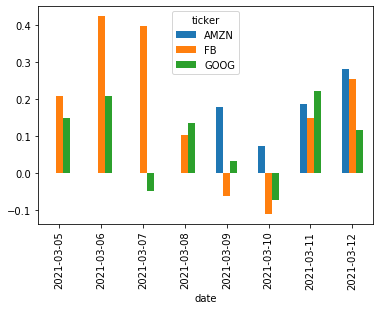

In [113]:
mean_df=df.groupby(['ticker','date']).mean()
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compund',axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()